# Доверительные интервалы на основе bootstrap

Для анализа известна только выборка. Функция распределения и параметры распределения неизвестны.  
Можно оценить любую статистику, не только среднее.  

- Сэмплируем выборки из неизвестного распределения.
- Для каждой выборки оценим статистику.
- По всем статистикам оценим эмперическое распредлеение.

In [1]:
import numpy as np
import pandas as pd

In [7]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Загрузка данных
### Время ремонта телекоммуникаций
Verizon - основная телекоммуникационная компания в западной части США, поэтому она должна ремонтировать оборудование не только своих клиентов, но и клиентов других компаний. Причем время ремонта для клиентов другой компании не должно быть больше, чем время ремонта для своих клиентов.   
- ILEC - клиент компании
- CLEC - клиент другой компании

Проверим гипотезу, что время ремонта для клиентов своей компании и для клиентов других компаний различается.

In [2]:
data = pd.read_csv('./data/verizon.csv', sep='\t')

In [3]:
data.head(1)

,Time,Group
0,17.5,ILEC


In [4]:
data.shape

(1687, 2)

In [5]:
data['Group'].value_counts()

ILEC    1664
CLEC      23
Name: Group, dtype: int64

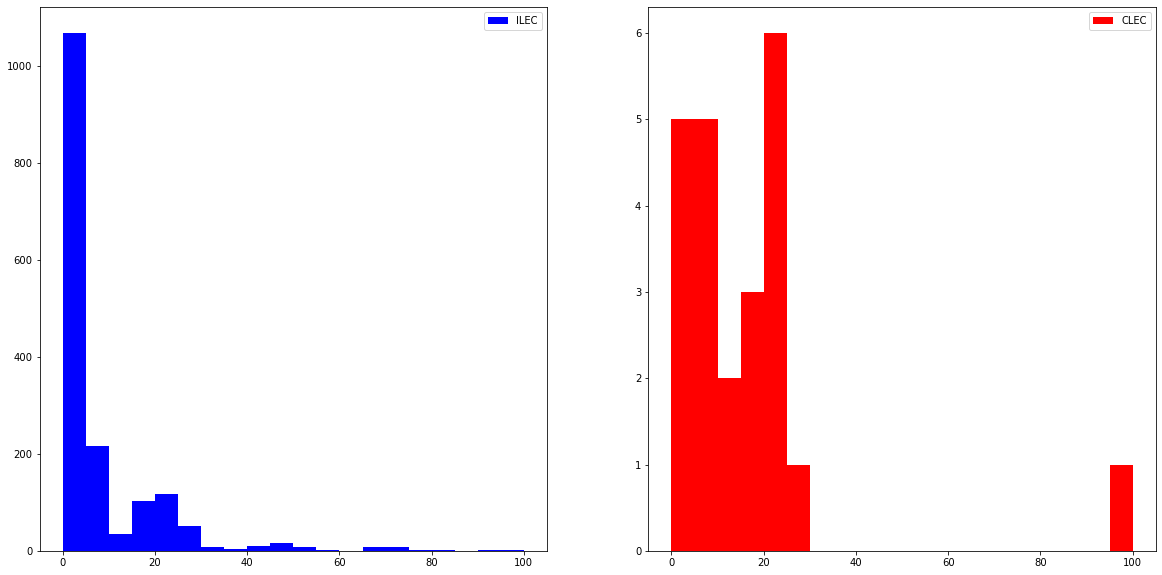

In [12]:
pylab.figure(figsize(20, 10))

pylab.subplot(1, 2, 1)
pylab.hist(data[data['Group'] == 'ILEC']['Time'], bins=20, color='b', range=(0, 100), label='ILEC')
pylab.legend()

pylab.subplot(1, 2, 2)
pylab.hist(data[data['Group'] == 'CLEC']['Time'], bins=20, color='r', range=(0, 100), label='CLEC')
pylab.legend()

На глаз можно прикинуть, что для своих клиентов ремонт происходит быстрее, но это еще не точно, поэтому будем проверять.

## Bootstrap 

In [13]:
def get_bootstrap_samples(data, n_samples):
    indices = np.random.randint(low=0, high=len(data), size=(n_samples, len(data)))
    samples = data[indices]
    return samples

In [27]:
def stat_intervals(stat, alpha):
    boundaries = np.percentile(stat, [100 * alpha / 2, 100 * (1 - alpha / 2)])
    return boundaries

### Интервальная оценка медианы

In [15]:
ilec_time = data[data['Group'] == 'ILEC']['Time'].values
clec_time = data[data['Group'] == 'CLEC']['Time'].values

In [16]:
np.random.seed(0)

In [25]:
ilec_median_scores = list(map(np.median, get_bootstrap_samples(ilec_time, 1000)))
clec_median_scores = list(map(np.median, get_bootstrap_samples(clec_time, 1000)))

In [28]:
print(f'95% conf interval for the ILEC median repair time: {stat_intervals(ilec_median_scores, 0.05)}')
print(f'95% conf interval for the CLEC median repair time: {stat_intervals(clec_median_scores, 0.05)}')

95% conf interval for the ILEC median repair time: [3.22 3.8 ]
95% conf interval for the CLEC median repair time: [ 5.8  20.28]


Доверительные интервалы не пересекаются. И интервал для своих клиентов лежит левее, чем интервал для клиентов других компаний. Следовательно, время ремонта для своих клиентов меньше, чем для клиентов других компаний.

### Точечная оценка разности медиан

In [29]:
print(f'Difference between medians: {np.median(clec_time) - np.median(ilec_time)}')

Difference between medians: 10.74


### Интервальная оценка разности медиан 
Просто так по полученным интервалам мы не имеем права оценить интервал разности медиан. Поэтому посчитаем разности для каждой из подвыборок, а потом для получившегося списка разности медиан найдем интервальную оценку.

In [31]:
delta_median_scores = list(map(lambda x: x[1] -  x[0], zip(ilec_median_scores, clec_median_scores)))

In [33]:
print(f'95% conf interval for the difference between medians: {stat_intervals(delta_median_scores, 0.05)}')

95% conf interval for the difference between medians: [ 2.1  16.65]
